# Table of Content<a class="anchor" id="table-of-content"></a>
* [1. Problem Introduction and Motivation](#problem-introduction)
* [2. Problem Background](#problem-background)
* [3. Libraries and Custome Functions](#libraries)
* [4. Data Preparation and Modeling](#modeling)
* [5. Training and Testing Model](#train-test-model)
* [6. Machine Learning](#machine-learning)

# 1.Problem Introduction and Motivation<a class="anchor" id="problem-introduction"></a>
* [Go to Top](#table-of-content)
<img src ='https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/cars-collage-1657824102.jpg'/>
     
### Problem  Introduction and Motivation
>Car is a vital tool that makes our life more convenient. In 2022, over 92% of households in the United States have a car. Seeing the differneces between the car prices, we hope to clarify the cause of the differences in car price and build a model that helps us predict the car prices. 
### Q & A
>**What is the prediction we are trying to make?**<br>
>We want to predict the car price according to the car's features.<br><br>
>**Why is it important?  Who cares?**<br>
>With the prediction, buyers and sellers of the car can both gain an insight of the car price. Creating more price transparency of the car. Sellers may want to see whether their price is similar to the market. Buyers may want to see if the car is over-pricing or lower-pricing, helping them to make decisions when buying cars.<br><br>
>**What are the possible actions that could be taken as a result of this work?**<br>
>For the sellers, they can evaluate the prices they set and make changes to the prices. For the buyers, they can compare the real price with the predicted price and help them decide whether to buy the car or not. <br><br>
>**How do we define success?**<br>
>We hope to build a model that the r2 in testing data is greater than 80%.

# 2. Problem Background<a class="anchor" id="problem-background"></a>
* [Go to Top](#table-of-content)
### The climbing car prices
>Due to several reasons, the car prices are rising in recent years. The main reason is the high demand and limited supplies. During the Covid-19 pandemic, many microchips manufactures changed to produce microchip for electronics, which demand is surging due to the pandemic, which cause the supplies of car-used microchips to drop. 
<img src ='https://i2.wp.com/financialsamurai.com/wp-content/uploads/2021/05/average-new-car-prices.png?fit=1456,9999'/>
### The popularity of car brands
>According to Customer Reports in 2022, the most popluar car brand is SUBARU, with a overall score of 81. The worst 
car brand is JEEP, with an overall score of 45. The overall score includes road tests, relaibility, satisfaction, and safety.
<img src ='https://o.aolcdn.com/images/dims3/GLOB/legacy_thumbnail/1600x900/format/jpg/quality/85/https://s.aolcdn.com/os/ab/_cms/2022/02/17103259/consumer-reports-brand-report-cards.jpg'/>

# 3. Libraries and Custome Functions<a class="anchor" id="libraries"></a>
* [Go to Top](#table-of-content)

In [1]:
import pandas as pd
# pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with
# "relational" or "labeled" data both easy and intuituve.

import numpy as np
# numpy is a Python library used for working with arrays. Is also has functions for working in domain of linear 
# algebra, fourier transform, and matrices.

import math
# math module allows you to perform mathematical tasks on numbers.

import statsmodels.api as sm
# statsmodels is a Python package that allows users to explore data, estimate statistical models, and perform 
# statistical tests. API stands for application programming interface, an API acts as a communication layer, or as 
# an interface that allows different systems to talk to each other without having to understand exactly what each 
# other does.

import pickle
# pickle is a module that is used for serializing and de-reserializing a Python object structure.

import matplotlib.pyplot as plt
# matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB.

import seaborn as sns
# seaborn is a data visualization library for statistical graphic plotting in Python, and it is based on matplotlib.

import plotly.graph_objects as go
# plotly.graph_objects is a module that contains an automatically generated hierarchy of Python classes which 
# represent non-leaf nodes in this figure schema.

from sklearn.linear_model import LogisticRegression
# sklearn.linear_model is a machine learning package. It offers a set of fast tools for machine learning and 
# statistical modeling, such as classification, regression, clustering, and dimenstionality reduction, and we want
# to import LogisticRegression tool from sklearn.linear_model.

from sklearn.metrics import accuracy_score
# sklearn.metrics is a module that implements several loss, score, and utility functions to measure classification
# performance, the accuracy_score function calculates the accuracy score for a set of predicted labels against the 
# true labels.

from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, r2_score, mean_squared_error
# sklearn.metrics is a module that implements several loss, score, and utility functions to measure classification
# performance, and we want to use the functions we import to calculate mean absolute percentage error(MAPE), mean 
# absolute error(MAE), R2 score, and mean squared error(MSE).

from sklearn.model_selection import train_test_split
# the train_test_split function of the sklearn.model_selection package splits array or matrices into random subsets
# for train and test data.

from sklearn.linear_model import LinearRegression
# the LinearRegression contains different functions for performing machine learning with linear models.

In [2]:
# Create a function for getting statistical values, it use dictionary to get the value of the of different measurements of 
# the data.
def my_summary_stats(X,feature_list):
    temp = pd.DataFrame(dict(mean = X[feature_list].mean().round(2),
                             median = X[feature_list].median().round(2),
                             std_dev = X[feature_list].std().round(2),
                             min_val = X[feature_list].min().round(2),
                             max_val = X[feature_list].max().round(2),
                             outlier_issue = np.where(X[feature_list].std()/X[feature_list].mean() > 2,
                                                      True,False)
                            ))
    return temp

def target_by_cats(X):
    '''
    This function assumes the input dataframe (X) has a numerically defined target
    variable in the first column and that all remaining features are categorical
    '''
    global_mean = X.iloc[:,0].mean()
    target = X.columns[0]
    for col in X.columns[1:]:
        df_group = X.groupby(by=col)[target].agg(['mean']).round(2)
        df_group['diff'] = (df_group['mean'] - global_mean).round(2)
        display(df_group)

In [3]:
# Create a function for training and testing data
def train_test_metrics(X_train,X_test,y_train,y_test,model):
    names=['R2','Adj-R2','MAE','MAPE','SSE'] 
    
    # Training Metrics
    y_hat = model.predict(X_train)
    
    # Create R2
    r2 = r2_score(y_train,y_hat).round(3)
    
    # Create adj_R2
    adj_r2 = (1-(1-r2_score(y_train,y_hat))*(len(y_train)-1)/(len(y_train)-len(model.coef_)-1)).round(3)

    
    train_metrics = [r2, adj_r2,
                     mean_absolute_error(y_train,y_hat).round(3),
                     mean_absolute_percentage_error(y_train,y_hat).round(3)*100,
                     (mean_squared_error(y_train,y_hat)*len(y_train)).round(3)
                    ]
    train_metrics = pd.DataFrame({'Train':train_metrics},index=names)
    
    # Testing Metrics
    y_hat = model.predict(X_test)
    test_metrics = [r2_score(y_test,y_hat).round(3),
                    (1-(1-r2_score(y_test,y_hat))*(len(y_test)-1)/(len(y_test)-len(model.coef_)-1)).round(3),
                    mean_absolute_error(y_test,y_hat).round(3),
                    mean_absolute_percentage_error(y_test,y_hat).round(3)*100,
                    (mean_squared_error(y_test,y_hat)*len(y_test)).round(3)
                   ]
    test_metrics = pd.DataFrame({'Test':test_metrics},index=names)
    
    all_metrics = train_metrics.merge(test_metrics,left_index=True,right_index=True)
    print(all_metrics)

# 4.Data Preparation and Modeling<a class="anchor" id="modeling"></a>
* [Go to Top](#table-of-content)

In [4]:
df = pd.read_csv('car_pricing_data.csv')
# df means data frame, the read_csv() function is used to retrieve data from from csv file, and this function is 
# in the pandas package so there is a pd. in front of the function.

df.info()
# Look at the information of the data frame.

df.tail()
# Look at the last 5 records of the data frame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


>**Initail evaluations and observations of the data**<br>
>>**Records:** 11914 (since starting from 0 to 11913)<br>
>>**Features in current data(total 16 features):** Make, Model, Year, Engine Fuel Type, Engine HP, Engine Cylinders, Transmission Type, Driven_Wheels, Number of Doors, Market Category, Vehicle Size, Vehicle Style, high MPG, city mpg, Popularity, MSRP<br>
>>**Potential features that we can add in the future:** Car Accident, Car Damage, Previous Owners, Service History,
Car Mileage <br>
>>**Data Type:** Reasonable(the actual data type is same as we expected)<br>
>>**Target Feature:** MSRP(Manufacturer Suggested Retail Price)
>>- MSRP is the most obvious candidate for the target feature. Besides, popularity seems to be a potential candidate of the target feature since it represents how successful the car is, and the stakeholders or investors might want to take a look at it.<br>
<br><br>

| Feature           | Thoughts/Expectations(impact on MSRP)          | Actual Data Type | Expected Data Type |
|------------------	|----------------------------------------------	 |------------------|--------------------|
| Make:    	        | car brand(++)                 	             | object           | object             |
| Model:      	    | car model(++)                     	         | object           | object             |
| Year:             | car launched year(neutral) 	                 | int64            | int                |
| Engine Fuel Type: | type of fuel the car use(neutral)   	         | object           | object             |    
| Engine HP: 	    | engine horsepower(+)                        	 | float64          | float              |
| Engine Cylinders: | number of cylinders in the engine(+)           | float64          | float              |
| Transmission Type:| type of transmission the car has(+)         	 | object           | object             |
| Driven_Wheels:    | the wheels that transmits force(+)           	 | object           | object             |
| Number of Doors:  | car's door number(neutral)                     | float64          | float              |
| Market Category:  | categorizing car type(++) 	                 | object           | object             |
| Vehicle Size:     | size of the car(++)           	             | object           | object             |
| Vehicle Style:    | style of the car(+)           	             | object           | object             |
| highway MPG:    	| mile per gallon on an open stretch conditons(+)| int64            | int                |
| city mpg:         | mile per gallon on city conditions(+)          | int64            | int                |
| Popularity:       | the popularity of the car(-)                   | int64            | int                |
| MSRP:         	| manufacturer suggested retailed price(target)  | int64            | int                |                     	

>**Initail cleanup**<br>
>>**Duplicates**<br>
>>**Missing Values**

In [5]:
# removing duplicates
print('Number of records:', len(df))
df.drop_duplicates()
print('Number of records after dropping dupes:', len(df))

# finding the total missing values for each column
df.isnull().sum()

Number of records: 11914
Number of records after dropping dupes: 11914


Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

>**Initail cleanup summary**<br><br>
*No duplicates in our data*<br><br>
*Missing values for the following fields:*<br>
-**Engine Fuel Type**: 3 - maybe replace with the fuel type based on Make feature and Model feature<br>
-**Engine HP**: 69 - could reasonably replace with mean of Engine HP<br>
-**Engine Cylinders**: 30 - could reasonably replace with mean of Engine Cylinders<br>
-**Number of Doors**: 6 - could reasonably replace with mean of Number of Doors<br>
-**Market Category**: 3742 - although it may have good correlation with MSRP, we drop it since there is too many misssing values<br>

In [6]:
# find the rows that have missing values of Engine Fuel Type
missing_engine_fuel_type = df[df['Engine Fuel Type'].isnull()]
missing_engine_fuel_type

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11321,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,17199
11322,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,20199
11323,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,18499


In [7]:
# find the Engine fuel type of Make equals Suzuki and Model equals Verona
suzuki_engine_fuel_type = df.loc[(df['Make'] == 'Suzuki') & (df['Model'] == 'Verona')]
suzuki_engine_fuel_type

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11321,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,17199
11322,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,20199
11323,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,18499
11324,Suzuki,Verona,2005,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,18,481,19349
11325,Suzuki,Verona,2005,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,18,481,21049
11326,Suzuki,Verona,2005,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,18,481,17549
11327,Suzuki,Verona,2005,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,18,481,20549
11328,Suzuki,Verona,2006,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,20299
11329,Suzuki,Verona,2006,regular unleaded,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,18299


In [8]:
# Identify all the numeric columns in the data frame and then show some statistics, we transpose the data frame by
# adding .T at the end
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,11914.0,2010.384338,7.579740,1990.0,2007.0,2015.0,2016.00,2017.0
Engine HP,11845.0,249.386070,109.191870,55.0,170.0,227.0,300.00,1001.0
Engine Cylinders,11884.0,5.628829,1.780559,0.0,4.0,6.0,6.00,16.0
Number of Doors,11908.0,3.436093,0.881315,2.0,2.0,4.0,4.00,4.0
highway MPG,11914.0,26.637485,8.863001,12.0,22.0,26.0,30.00,354.0
city mpg,11914.0,19.733255,8.987798,7.0,16.0,18.0,22.00,137.0
Popularity,11914.0,1554.911197,1441.855347,2.0,549.0,1385.0,2009.00,5657.0
MSRP,11914.0,40594.737032,60109.103604,2000.0,21000.0,29995.0,42231.25,2065902.0


>**Filling missing values**<br><br>
-**Engine Fuel Type**: regular unleaded - the engine fuel type of Suzuki with Verona model is usually regular unleaded<br>
-**Engine HP**: 249.39 - round the mean of Engine HP to 2 decimal places<br>
-**Engine Cylinders**: 5.63 - round the mean of Engine Cylinders to 2 decimal places<br>
-**Number of Doors**: 3.44 - round the mean of Number of Doors to 2 decimal places<br>
-**Market Category**: decide to drop the whole column

In [9]:
# Fill the NaN value in Enigine Fuel Type with 'regular unleaded'
df['Engine Fuel Type'] = df['Engine Fuel Type'].fillna('regular unleaded')
#suzuki_engine_fuel_type = df.loc[(df['Make'] == 'Suzuki') & (df['Model'] == 'Verona')]
#suzuki_engine_fuel_type

# Fill the NaN value in Engine HP with 249.39
df['Engine HP'] = df['Engine HP'].fillna(249.39)
#engine_hp = df.loc[df['Engine HP'].isnull()]
#engine_hp

# Fill the NaN value in Engine Cylinders with 5.63
df['Engine Cylinders'] = df['Engine Cylinders'].fillna(5.63)
#engine_cylinder = df.loc[df['Engine Cylinders'].isnull()]
#engine_cylinder

# Fill the NaN value in Number of Doors with 3.44
df['Number of Doors'] = df['Number of Doors'].fillna(3.44)
#number_of_doors = df.loc[df['Number of Doors'].isnull()]
#number_of_doors

# Drop the whole column of Market Category
df = df.drop('Market Category',axis=1)

# Checking if there is any missing values left
df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

>**Outlier Detection & Treatment**

In [10]:
# Create a dataframe that only contains numerical variables and use the funtion 'my_summary_stats' to gain an insight
# of the statistical value of the variables.
numerical_vars = ['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']
my_summary_stats(df,numerical_vars)

,mean,median,std_dev,min_val,max_val,outlier_issue
Year,2010.38,2015.0,7.58,1990.0,2017.0,False
Engine HP,249.39,227.0,108.88,55.0,1001.0,False
Engine Cylinders,5.63,6.0,1.78,0.0,16.0,False
Number of Doors,3.44,4.0,0.88,2.0,4.0,False
highway MPG,26.64,26.0,8.86,12.0,354.0,False
city mpg,19.73,18.0,8.99,7.0,137.0,False
Popularity,1554.91,1385.0,1441.86,2.0,5657.0,False
MSRP,40594.74,29995.0,60109.10,2000.0,2065902.0,False


> **Initial evaluations and observations of numerical features:**<br><br>
There seems to be some ouliers in the following features(comparing max_val and min_val with mean)<br>
>- Engine HP
>- highway MPG
>- city mpg
>- Popularity

>We are not going to deal with the outliers of MSRP since it is our target feature

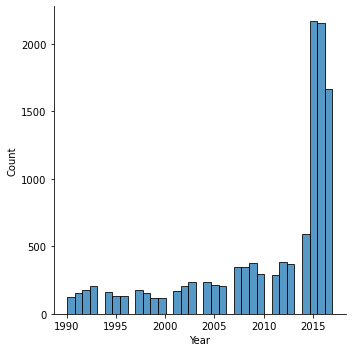

In [11]:
# Displot the overall distribution of Year
sns.displot(df['Year'])

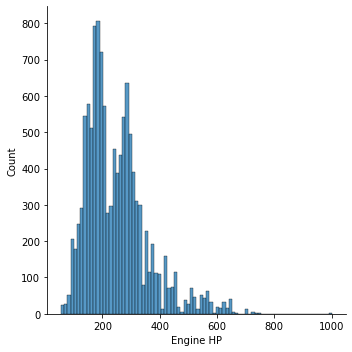

In [12]:
# Displot the overall distribution of Engine HP 
sns.displot(df['Engine HP'])

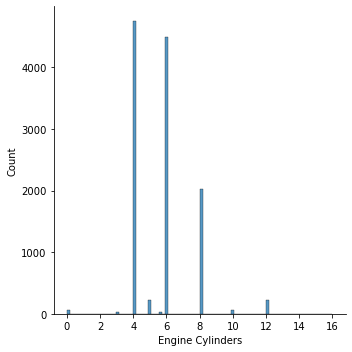

In [13]:
# Displot the overall distribution of Engine Cylinders
sns.displot(df['Engine Cylinders'])

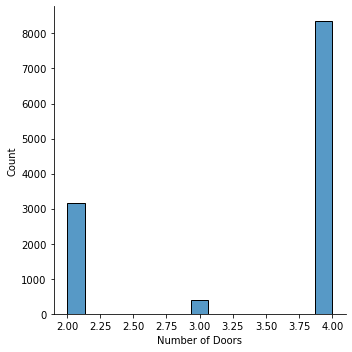

In [14]:
# Displot the overall distribution of Number of Doors
sns.displot(df['Number of Doors'])

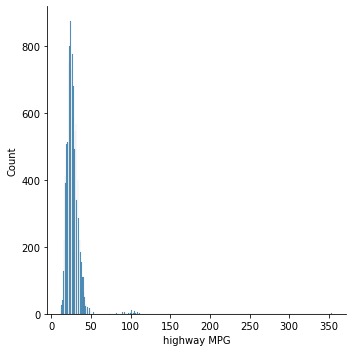

In [15]:
# Displot the overall distribution of highway mpg
sns.displot(df['highway MPG'])

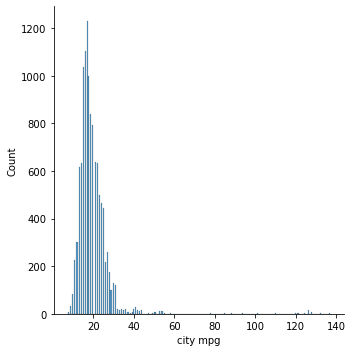

In [16]:
# Displot the overall distribution of city mpg
sns.displot(df['city mpg'])

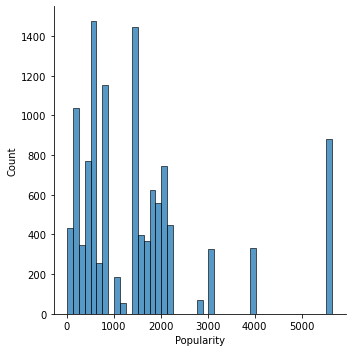

In [17]:
# Displot the overall distribution of Popularity
sns.displot(df['Popularity'])

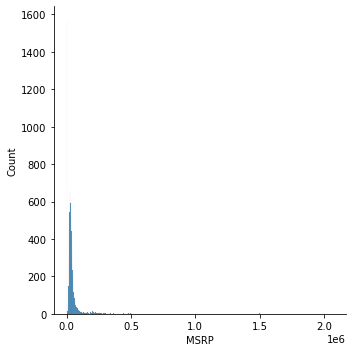

In [18]:
# Displot the overall distribution of MSRP, 1e6 means 1 * (10**6)
sns.displot(df['MSRP'])

> **Evaluating all the numerical variables using displot(getting histogram of the feature):**<br><br>
>We want to use histogram to take a look of the variables and help us decide whether we need to set a threshold to drop some data in order to make our model perform better.

/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MSRP'>

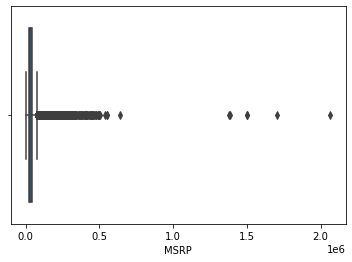

In [19]:
# Boxplot the target variable 'MSRP' to get closer look at the distribution of MSRP, 1e6 means 1 * (10**6)
sns.boxplot(df['MSRP'])

> **Evaluating MSRP using boxplot:**<br><br>
>Box plot shows the minimum, lower quartile, median, upper quartile, and maximum, and outliers of the target variables.
> With the box plot, we can take a closer look at the outliers of the MSRP comparing to the graph above, there are some outliers pricing from 1.5e6 to 2e6.

> **Setting thresholds for numerical features:**<br><br>
>- Engine HP: < 700
>- highway MPG: < 50
>- city mpg: < 40
>- Popularity:< 4000

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11914 non-null  object 
 4   Engine HP          11914 non-null  float64
 5   Engine Cylinders   11914 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11914 non-null  float64
 9   Vehicle Size       11914 non-null  object 
 10  Vehicle Style      11914 non-null  object 
 11  highway MPG        11914 non-null  int64  
 12  city mpg           11914 non-null  int64  
 13  Popularity         11914 non-null  int64  
 14  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.4+ MB


In [21]:
# Remove outliers based on thresholds described above
print('Number of records BEFORE outlier handling:', len(df))
df = df[df['Engine HP'] < 700]
df = df[df['highway MPG'] < 50]
df = df[df['city mpg'] < 40]
df = df[df['Popularity'] < 2500]
print('Number of records AFTER outlier handling:', len(df))

Number of records BEFORE outlier handling: 11914
Number of records AFTER outlier handling: 10096


In [22]:
#df.info()

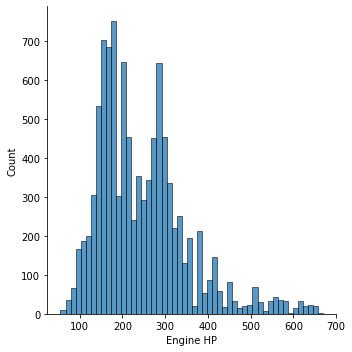

In [23]:
# Displot the overall distribution of Engine HP after setting threshold
sns.displot(df['Engine HP'])

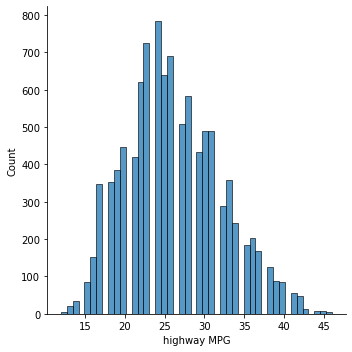

In [24]:
# Displot the overall distribution of highway mpg after setting threshold
sns.displot(df['highway MPG'])

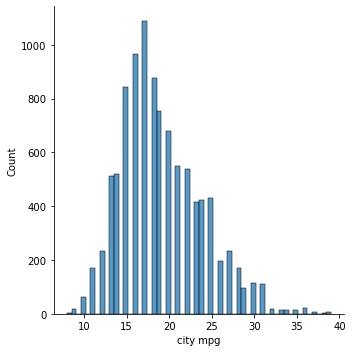

In [25]:
# Displot the overall distribution of city mpg after setting threshold
sns.displot(df['city mpg'])

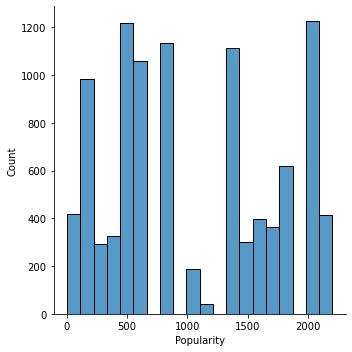

In [26]:
# Displot the overall distribution of Popularity after setting threshold
sns.displot(df['Popularity'])

> **Draw the histogram again after setting threshold for the variables:**<br><br>
>- The histograms are more concentrated after setting the threshold, we hope this could make our model prediction more accurate.

<AxesSubplot:xlabel='MSRP'>

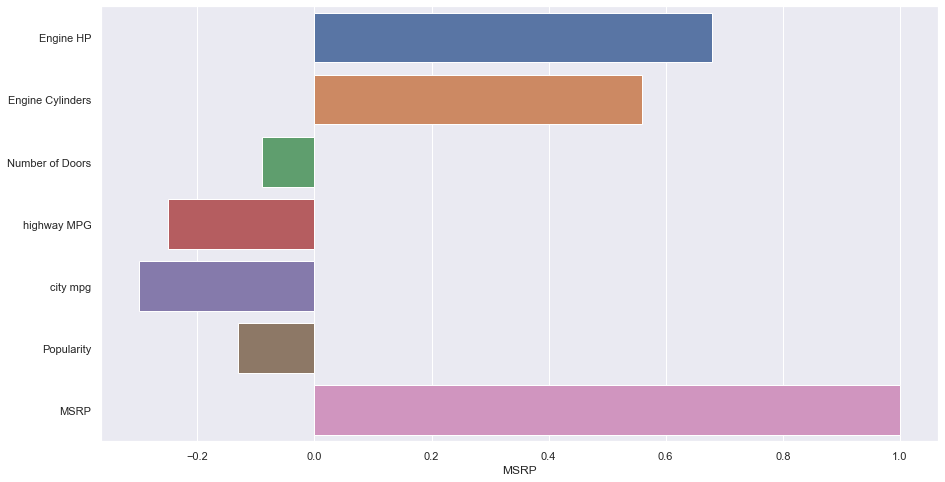

In [27]:
# Find the correlations between our target variable and the remaining numerical features
# Instead of displaying in a heatmap or table, let's drop those values into a horizontal barchart
# for easier viewing
a = df[numerical_vars].corr()[['MSRP']].round(2)
sns.set(rc= {'figure.figsize':(15,8)})
sns.barplot(x=a.MSRP[1:],y=a.index[1:],data=a, orient='h')

> **Initial evaluations and observations of numerical features by using barchart:**<br><br>
>The correlations between features and MSRP:
>1. Engine HP (+): Same as we expected. Greater Engine HP comes from better engine, which will increase the cost of the car and thus increases the car price.
>2. Engine Cylinders (+): Same as we expected. Engine cylinder is the power unit of the engine, more engine cylinders creates more power but also increases the cost of the car and thus increases the car price.
>3. Number of Doors (-): We thought this feature doesn't have impact on the price. Maybe it is because sportscar usually has two doors, and sportscar price is usually higher than other cars.
>4. highway MPG (-): Not as we expected. Maybe it is because small cars usually have higher highway MPG than the big cars, and the prices of the small cars are usually less than the big cars.
>5. city mpg (-):Not as we expected. Maybe it is because small cars usually have higher city mpg than the big cars, and the prices of the small cars are usually less than the big cars.
>6. Popularity (-): Same as we expected. Lower price means it is affordable to more people, and attract more people's attention.

> **Intial evaluations and observations of categorical features:**<br><br>
>The categorical features in the data:
>1. Make
>2. Model
>3. Engine Fuel Type
>4. Transmission Type
>5. Driven_Wheels
>6. Market Category(already drop the column due to the large number of missing values)
>7. Vehicle Size
>8. Vehicle Style

In [28]:
#df.info()

In [29]:
# Create temp dataframe with target and categorical variables only
categorical = ['object']
X = pd.merge(df['MSRP'],df.select_dtypes(include=categorical),left_index=True,right_index=True)

# Compute average target values for all categorical alternatives
target_by_cats(X)

,mean,diff
Make,,
Acura,34887.59,-3461.68
Alfa Romeo,61600.00,23250.73
Aston Martin,197910.38,159561.11
Bentley,247169.32,208820.05
Buick,28206.61,-10142.66
Cadillac,56231.32,17882.05
Chevrolet,28346.14,-10003.13
Chrysler,26722.96,-11626.31
Dodge,21992.35,-16356.92


,mean,diff
Model,,
124 Spider,26895.00,-11454.27
190-Class,2000.00,-36349.27
2,15821.67,-22527.60
200,26582.17,-11767.10
200SX,2008.11,-36341.16
...,...,...
iQ,16168.75,-22180.52
tC,21546.43,-16802.84
xA,12996.67,-25352.60


,mean,diff
Engine Fuel Type,,
diesel,35354.26,-2995.01
flex-fuel (premium unleaded recommended/E85),49935.24,11585.97
flex-fuel (premium unleaded required/E85),159429.35,121080.08
flex-fuel (unleaded/E85),36757.55,-1591.72
flex-fuel (unleaded/natural gas),39194.17,844.90
natural gas,28065.00,-10284.27
premium unleaded (recommended),40777.21,2427.94
premium unleaded (required),98867.01,60517.74
regular unleaded,23087.92,-15261.35


,mean,diff
Transmission Type,,
AUTOMATED_MANUAL,75194.35,36845.08
AUTOMATIC,41119.45,2770.18
MANUAL,24989.80,-13359.47
UNKNOWN,3040.74,-35308.53


,mean,diff
Driven_Wheels,,
all wheel drive,53211.48,14862.21
four wheel drive,35842.31,-2506.96
front wheel drive,22781.63,-15567.64
rear wheel drive,53759.46,15410.19


,mean,diff
Vehicle Size,,
Compact,30600.17,-7749.10
Large,55144.61,16795.34
Midsize,36824.50,-1524.77


,mean,diff
Vehicle Style,,
2dr Hatchback,17332.43,-21016.84
2dr SUV,8893.43,-29455.84
4dr Hatchback,20711.04,-17638.23
4dr SUV,39727.34,1378.07
Cargo Minivan,20605.00,-17744.27
Cargo Van,14051.90,-24297.37
Convertible,80801.70,42452.43
Convertible SUV,17424.14,-20925.13
Coupe,63665.38,25316.11


In [30]:
#df.info()

In [31]:
#Find the number of unique value for each categorical features
#df['Make'].nunique()
#df['Model'].nunique()
#df['Engine Fuel Type'].nunique()
#df['Transmission Type'].nunique()
#df['Driven_Wheels'].nunique()
#df['Vehicle Size'].nunique()
#df['Vehicle Style'].nunique()

>**Assessment of Categorical Features:**<br><br>
>Features that seem to matter:<br>
>1. **Make** (42 unique values): too much unique values
>2. **Model** (755 unique values): too much unique values
>3. **Engine Fuel Type** (9 unique values): too much unique values
>4. **Transmission Type** (4 unique values)
>5. **Driven_Wheels** (4 unique values)
>6. **Vehicle Size** (3 unique values)
>7. **Vehicle Style** (16 unique values): too much unique values
<br>

>Drop:<br>
>- We do not drop any categorical features

In [32]:
#df.info()

In [33]:
# Keep top 4 Makes and label all the rest as "OTHER"
keep = df['Make'].value_counts().index[:4]
df['Make'] = np.where(df['Make'].isin(keep), df['Make'], 'OTHER')

# Keep top 4 Models and label all the rest as "OTHER"
keep = df['Model'].value_counts().index[:4]
df['Model'] = np.where(df['Model'].isin(keep), df['Model'], 'OTHER')

# Keep top 4 Engine Fuel Types and label all the rest as "OTHER"
keep = df['Engine Fuel Type'].value_counts().index[:4]
df['Engine Fuel Type'] = np.where(df['Engine Fuel Type'].isin(keep), df['Engine Fuel Type'], 'OTHER')

# Keep top 4 Vehicle Styles and label all the rest as "OTHER"
keep = df['Vehicle Style'].value_counts().index[:4]
df['Vehicle Style'] = np.where(df['Vehicle Style'].isin(keep), df['Vehicle Style'], 'OTHER')

In [34]:
# Create a new version of 'MSRP' - a log tranformation
df['ln_msrp'] = np.log1p(df['MSRP'])

# Flag categorical variables and convert to dummies
cat_vars = ['Make','Model','Engine Fuel Type',
            'Transmission Type','Driven_Wheels','Vehicle Size','Vehicle Style'
           ]
for var in cat_vars:
    df[var] = df[var].astype("category")
# Conver to dummies
#df = pd.get_dummies(df['Make'])
df = pd.get_dummies(df,columns=cat_vars, prefix_sep='_', drop_first=True)

In [35]:
#df.info()

In [47]:
#df.head()

>**Feature Transformation:**<br><br>
>- Target feature(MSRP): log transformation
>- Other categorical features: if the unique values of the categorical variables is greater than 4, we will keep the top 4 and label all the rest as 'OTHER', after that we encoded the variables
>-The first category for each categorical variable was dropped<br>

> **Data Partitioning:** <a class="anchor" id="data-split"></a>
<br>
>To Do:<br>
>1. Put all potential predictor variables into new object called 'X'
>2. Put target variable in new object called 'y'
>3. Partition data into training set and testing set<br>

# 5.Training and Testing Model<a class="anchor" id="train-test-model"></a>
* [Go to Top](#table-of-content)

In [36]:
predictors = ['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors','highway MPG','city mpg','Popularity',
              'Make_Dodge', 'Make_OTHER','Make_Toyota','Make_Volkswagen','Model_OTHER','Model_Sierra 1500',
              'Model_Silverado 1500', 'Model_Tundra','Engine Fuel Type_flex-fuel (unleaded/E85)','Engine Fuel Type_premium unleaded (recommended)',
              'Engine Fuel Type_premium unleaded (required)', 'Engine Fuel Type_regular unleaded','Transmission Type_AUTOMATIC','Transmission Type_MANUAL',
              'Transmission Type_UNKNOWN','Driven_Wheels_four wheel drive','Driven_Wheels_front wheel drive','Driven_Wheels_rear wheel drive',
              'Vehicle Size_Large','Vehicle Size_Midsize','Vehicle Style_Convertible','Vehicle Style_Coupe','Vehicle Style_OTHER','Vehicle Style_Sedan']

target = ['ln_msrp']

X = df[predictors]
y = df[target]

# Split data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=1)

# 6.Machine Learning<a class="anchor" id="machine-learning"></a>
- [X] [Model1](#first-model)
- [X] [Model2](#second-model)
- [X] [Model3](#third-model)
- [X] [Conclusion](#conclusion)
* [Go to Top](#table-of-content)

> **Model 1** <a class="anchor" id="first-model"></a>
<br>
>Instructions:<br>
>Simple regression model:
>- For this model - since we can only use one explanatory variable - we choose 'Engine HP'
>- The reason is that 'Engine HP' variable had the highest correlation with MSRP
>- Evaluate MAPE and R2- use as simple baseline model for future reference

In [37]:
simple_var = ['Engine HP']

model = LinearRegression()
model.fit(X_train[simple_var],y_train)

# Display Output
train_test_metrics(X_train[simple_var],X_test[simple_var],y_train,y_test,model)

           Train      Test
R2         0.460     0.453
Adj-R2     0.460     0.453
MAE        0.602     0.580
MAPE       6.600     6.300
SSE     4738.782  1857.240


In [38]:
# Since our target variable was tranformed with the natural log function
# we need to do the following conversion of our predictor variable coefficient
# to more easily interpret it
round((math.exp(model.coef_[0])-1)*100,2)

0.72

>**Model 1 Summary:**<br>
>The MAPE for training data is 6.600, and the MAPE for test data is 6.300. The MAPE seems to be high. The small difference indicates that Engine HP really matters when predicting MSRP. Besides, according to the R2 score of the testing data, only about 45 % of price variation can be explained by our model, so it seems that we need to add more explanatory variables to help our model perform better.
<br><br>
>**Coefficient Interpretation:**<br>
>Using the conversion above we get 0.72.
>In words, this means that for each additional Engine HP we expect the MSRP to increase by 0.72%, all other things held constant.
<br><br>
>**Overfitting:**<br>
>No overfitting here - The MAPE of Training data and Tesing data are close
>It is a surprise that we only one explanatory variable, the model doesn't have a large difference between the Training data and Testing data.
<br><br>
>[Go to Machine Learning Outline](#machine-learning)

> **Model 2** <a class="anchor" id="second-model"></a>
<br>
>Instructions:<br>
Regression model:
>- For this model - we should include ONE continuous numerical feature and ONE categorical variable - we choose 'Engine HP' and 'Transmission Type_AUTOMATIC'
>- The reason is that 'Engine HP' variable had the highest correlation with MSRP, and 'Transmission Type_AUTOMATIC' is the most popular among the transmission types
>- Evaluate MAPE and R2 - compare the results with model 1

In [39]:
predictors = ['Engine HP','Transmission Type_AUTOMATIC']

model2 = LinearRegression()
model2.fit(X_train[predictors],y_train)

# Display Output
train_test_metrics(X_train[predictors],X_test[predictors],y_train,y_test,model2)

           Train      Test
R2         0.489     0.485
Adj-R2     0.489     0.485
MAE        0.580     0.560
MAPE       6.400     6.100
SSE     4488.440  1748.018


In [40]:
# coef_: array of shape (n_features, ) or (n_targets, n_features)
print('Engine HP effect on MSRP:', round((math.exp(model2.coef_[0][0])-1)*100,2))
print('Transmission Type_AUTOMATIC effect on MSRP:', round((math.exp(model2.coef_[0][1])-1)*100,2))

Engine HP effect on MSRP: 0.69
Transmission Type_AUTOMATIC effect on MSRP: 52.46


>**Model 2 Summary:**<br>
>The MAPE for training data is 6.400, and my MAPE for test data is 6.100. The MAPE seems to be high. Transmission Type seems to have greater effect MSRP compared to Engine HP. Besides, according to the R2 score of the testing data, about 48 % of price variation can be explained by our model, although the performance if better than model 1, the percentage is still too low and we should add more variables to make our model better.
<br><br>
>**Coefficient Interpretation:**<br>
>Using the conversion above, we get 0.69 for Engine HP and 52.46 for Transmission Type_AUTOMATIC.
<br><br>
>**Overfitting:**<br>
>No overfitting here - The MAPE of training data and testing data are close.
>There isn't a significant difference between the performance of MAPE in model 1 and model 2.
<br><br>
>[Go to Machine Learning Outline](#machine-learning)

> **Model 3** <a class="anchor" id="third-model"></a>
<br>
>Instructions:<br>
>Regression model:
>- For this model - we can use as many features as we want - we choose 'Engine HP', 'Enigne Cylinders', and all of the Transmission Types.
>- The reason is that 'Engine HP' and 'Engine Cylinders' are the only two numerical variables that has a positive correlation with MSRP. Seeing from model 2 that 'Transmission Type_AUTOMATIC' matters when predicting MSRP, we want to add other transmission types in this model.
>- Evaluate MAPE and R2.

In [41]:
predictors = ['Engine HP','Engine Cylinders','Transmission Type_AUTOMATIC','Transmission Type_MANUAL','Transmission Type_UNKNOWN']

model3 = LinearRegression()
model3.fit(X_train[predictors],y_train)

# Display Output
train_test_metrics(X_train[predictors],X_test[predictors],y_train,y_test,model3)

           Train      Test
R2         0.572     0.563
Adj-R2     0.572     0.563
MAE        0.526     0.502
MAPE       5.700     5.400
SSE     3753.984  1482.570


>**Model 3 Summary:**<br>
>The MAPE for training data is 5.700, and the MAPE for test data is 5.400. The MAPE seems to be high, but the value is smaller than the previous two model, indicating that the variables we added in our predictors has positive effect on our model. Besides, according to the R2 score of the testing data, about 56 % of price variation can be explained by our model, the performance is improving but still far from being a good model.
<br><br>
>**Overfitting:**<br>
>No overfitting here - the MAPE of training and testing are close.
<br><br>
>[Go to Machine Learning Outline](#machine-learning)

>**Conclusion:**<br><a class="anchor" id="conclusion"></a>
>- Final model's(model 3) performance: We are not satisfied with the performance of the final model. Although the r2 of the final model is better than the previous 2 model, the percentage is still too low. We hope the r2 of the be over 80%.
>- Proposition for next steps: Maybe adding more categorical variables in the predictors since the remaining numerical variables doesn't has a positive correlation with our target variable.
>- What would I do differently if I could:  I would drop the missing values instead of filling it if the missing value number is too large(>10) because the more missing values we fill in, the more chance we may fill in a wrong value and thus making our prediction performance worse.
>- Things we want to communicate to business leadership in the industry: Since both 'Engine HP' and 'Engine Cylinders' have a positive correlation with car price(MSRP), car corporates can try to calculate the cost of increasing Engine HP or Engine Cylinders of their cars, and compare to the extra revenue they can earn by increasing the price. If the extra revenue is larger than the cost, then it might be feasible strategy for the car corporate to increase Engine HP or Engine Cylinders of their car.
<br><br>
>[Go to Machine Learning Outline](#machine-learning)